# Visualizing pre-trained ResNet optima

In [21]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('/Users/sasaatlasov/Desktop/MLDM_Project')

import torch
import torchvision
import torchvision.datasets as datasets

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Dowloading pre-trained weights, choosing loss function and model (ResNet18) with no weights.

In [2]:
optima = torchvision.models.resnet18(weights='DEFAULT').state_dict()
model = torchvision.models.resnet18(weights=None)
criterion = torch.nn.CrossEntropyLoss()

As an example we will take a batch from CIFAR10 dataset.

In [3]:
mnist_train = datasets.CIFAR10(root='./data', train=True, download=True, transform=torchvision.transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=128, shuffle=True)
x, y = iter(train_loader).__next__()

Files already downloaded and verified


## 1D plot

  0%|          | 0/50 [00:00<?, ?it/s]

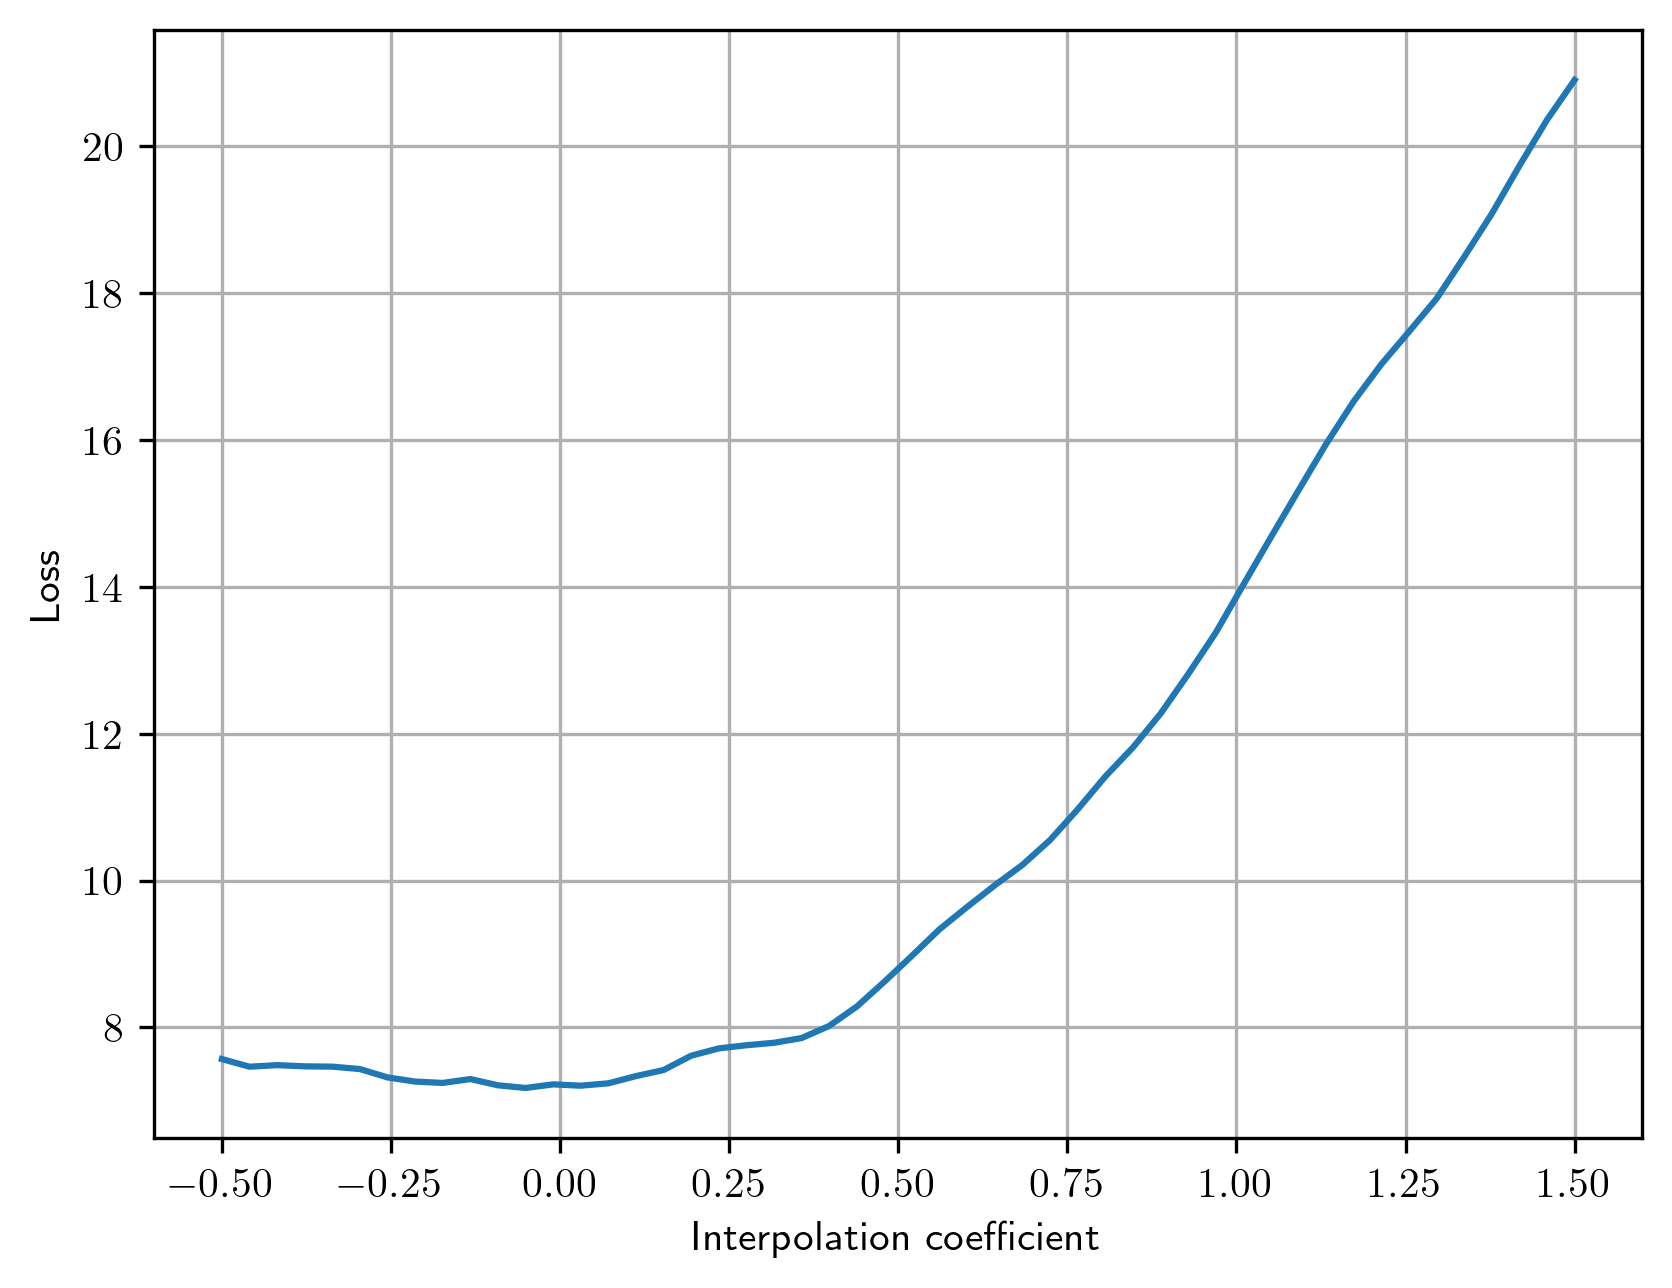

In [4]:
from loss_landscape.plot_1D import calculate_metrics, plot_1D
metrics = calculate_metrics(model, criterion, x, y, optima)
plot_1D(metrics)

## 2D plot

  0%|          | 0/20 [00:00<?, ?it/s]

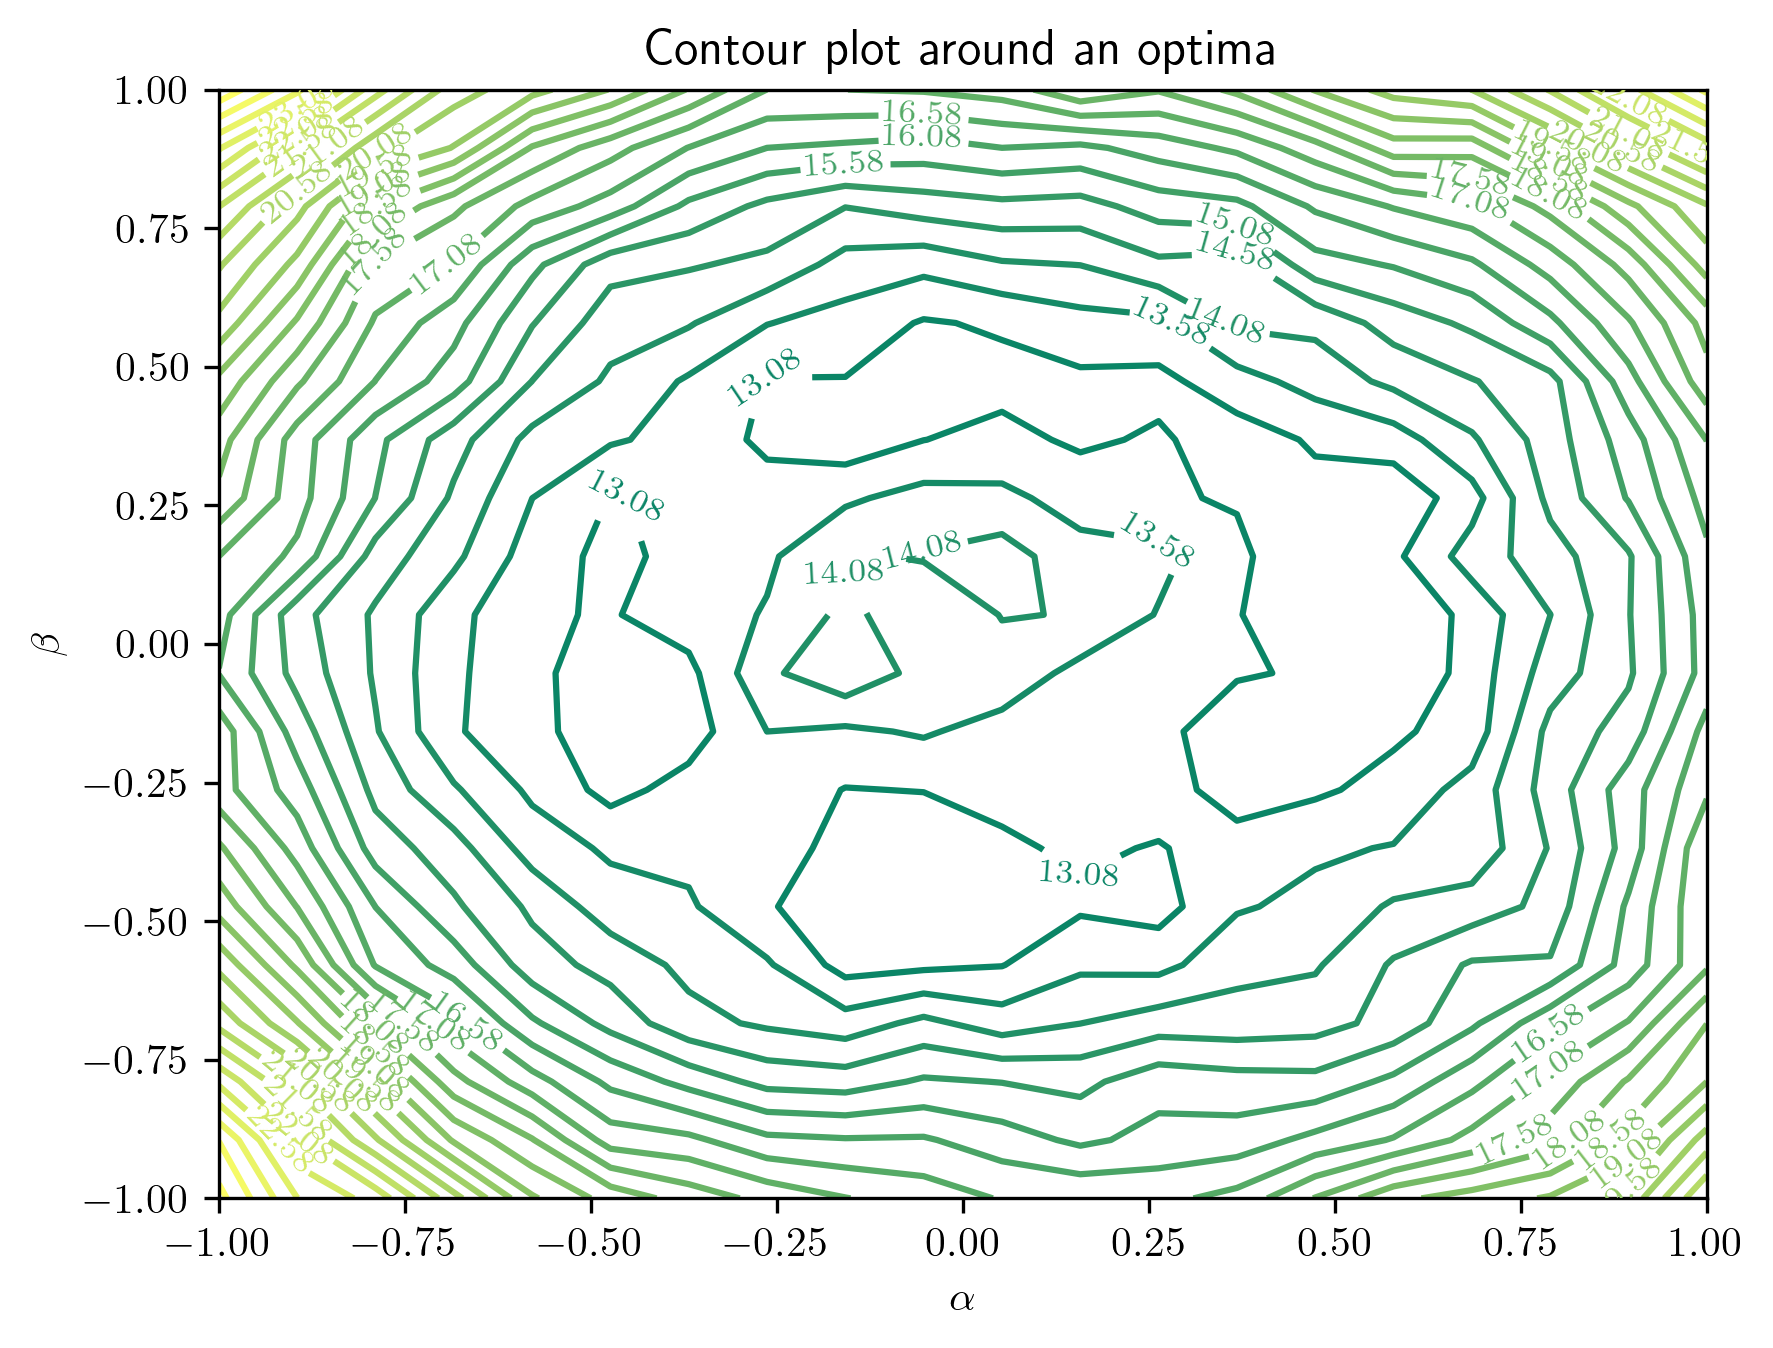

In [8]:
from loss_landscape.plot_2D import calculate_metrics, plot_2D
metrics = calculate_metrics(model, criterion, optima, x, y, num_steps=20)
plot_2D(metrics)

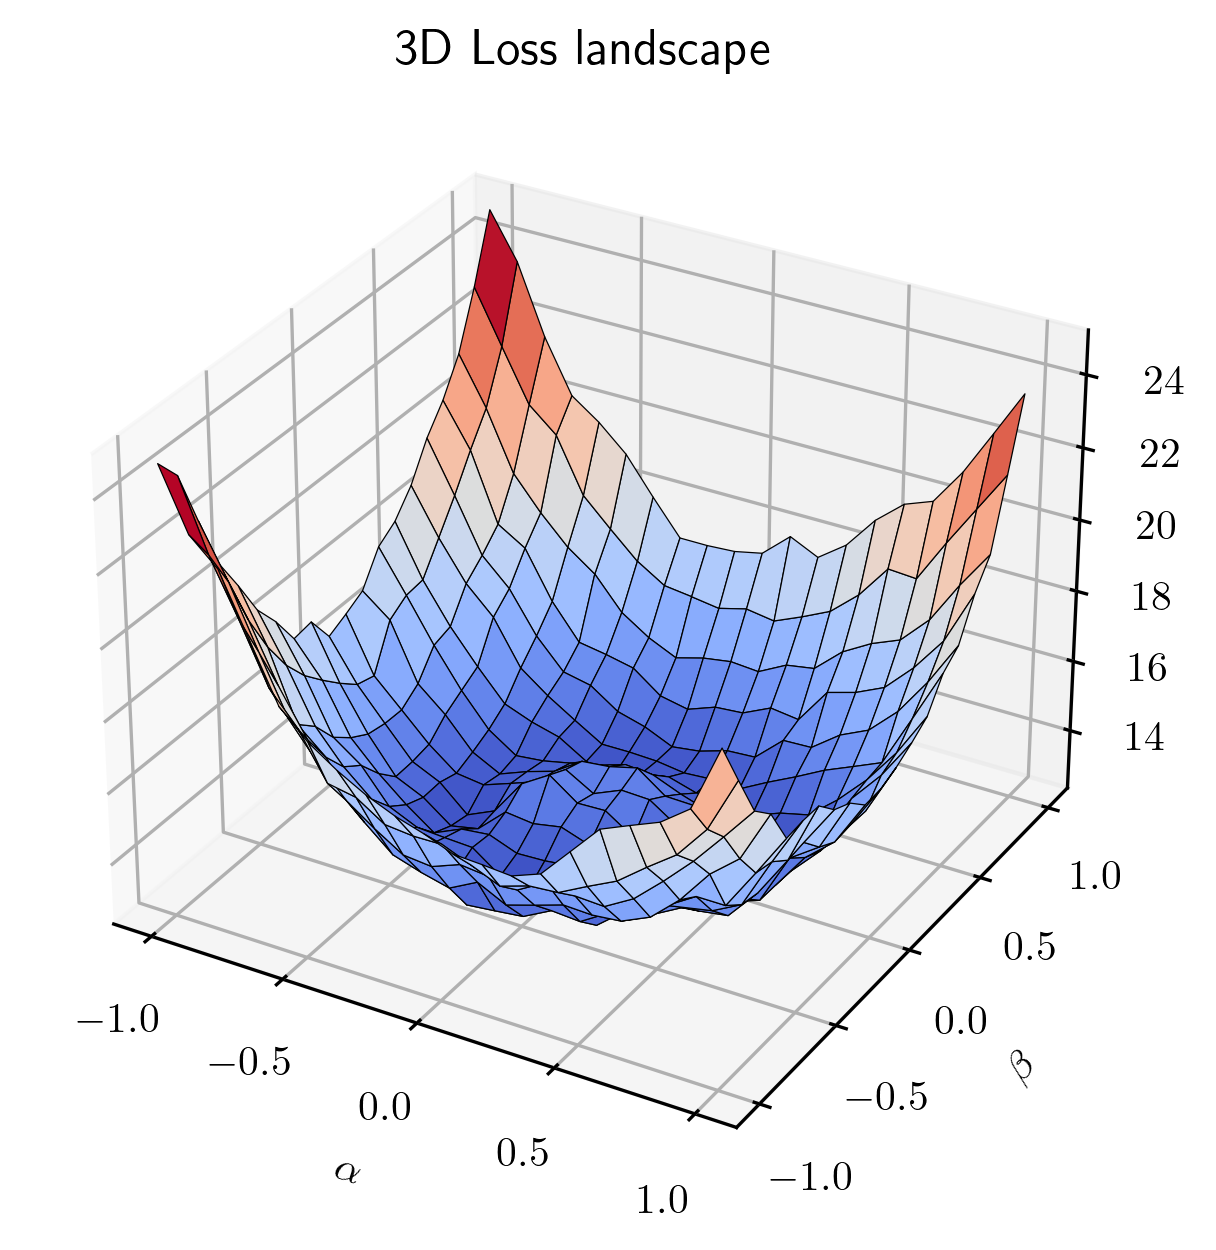

In [24]:
from loss_landscape.plot_2D import plot_3D

%matplotlib inline
plot_3D(metrics)